#Lecture 1 : Preprocessing and visualization of the acceleration data of green turtles*
<br>

*The data were collected as part of the research projects of Damien Chevallier, Centre National de la Recherche Scientifique (CNRS France)

<br>

lorene@aims.ac.za

African Institute for Mathematical Sciences

Machine Learning for Ecology Research Group



Get the green turtle dataset. To do this, you need to make a shortcut to a shared Google Drive directory in your Google Drive.

1.   Go to the shared Google Drive: [https://drive.google.com/drive/folders/1ifEctcqvziZkfFr6rVrjFKGfMJkTWjgv?usp=sharing](https://drive.google.com/drive/folders/1ifEctcqvziZkfFr6rVrjFKGfMJkTWjgv?usp=sharing)
2.   Select "Add shortcut to Drive" and select "My Drive".


## Download files needed from Google Drive

It will ask you to authenticate with your Google account.

In [2]:
# connect to google drive via your google account
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#change the directory , write the path where your data are located
%cd /content/drive/MyDrive/Shortcut to courses materials/Deep Learning for ecology

/content/drive/MyDrive/Shortcut to courses materials/Deep Learning for ecology


In [5]:
#chack that the folder is on your working directory
%ls

AnnotationReader.py  Data_Acceleration_GreenTurtle@  data_y_new.npy    __pycache__/   train_y.npy
Code.zip             data_x_new.npy                  data_y.npy        spec_data.npy
Data/                data_x.npy                      Preprocessing.py  train_x.npy


In [ ]:
#to clean your colab and delete all variables
%reset -f

## Librairies

In [6]:
import json
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

#### load first the dictionary containing the information about the data

In [7]:
FOLDER_NAME="Data_Acceleration_GreenTurtle"

In [8]:
def load_dico(path,key_int=False,print_me=False):
    with open(path) as f:
        dico_str = json.loads(json.load(f))

    if key_int:
        conv_key=lambda k:int(k)
    else:
        conv_key=lambda k:k

    dico={conv_key(k):v for k,v in dico_str.items()}

    if print_me:
        print(dico)

    return dico

In [9]:
dico_info=load_dico(FOLDER_NAME+"/dico_info.json",print_me=True);
behName_to_behInd=load_dico(FOLDER_NAME+ "/behName_to_behInd.json",print_me=True);
behInd_to_behName=load_dico(FOLDER_NAME+"/behInd_to_behName.json",key_int=True,print_me=True)

{'RESAMPLING_STEP_S': 0.05, 'col_names': ['Accelerometer X [m/s²]', 'Accelerometer Y [m/s²]', 'Accelerometer Z [m/s²]', 'Gyroscope X [mrad/s]', 'Gyroscope Y [mrad/s]', 'Gyroscope Z [mrad/s]', 'Depth [m]', 'beh']}
{'Acceleration': 0, 'Basking': 1, 'Breathing': 2, 'Catching': 3, 'Catching jellyfish': 4, 'Chewing on movement': 5, 'Chewing stationary': 6, 'Chewing jellyfish': 7, 'Escape': 8, 'Evasion': 9, 'Evitement': 10, 'Feeding': 11, 'Feeding stationary': 12, 'Feeding on movement': 13, 'Flipper beat': 14, 'Foraging': 15, 'Gliding ascent': 16, 'Gliding descent': 17, 'Grabbing on movement': 18, 'Grabbing stationary': 19, 'Grabbing the wall': 20, 'Grabbing wall': 21, 'Hunting jellyfish': 22, 'Interaction': 23, 'Landing': 24, 'Nouvelle video': 25, 'Obstacle': 26, 'Prospection': 27, 'Pursuit': 28, 'Resting': 29, 'Resting active': 30, 'Resting in flow': 31, 'Resting watching': 32, 'Sand': 33, 'Scratching': 34, 'Scratching head': 35, 'Scratching camera': 36, 'Shaking': 37, 'Shaking head': 38, 

#### load the matrix of each individual (n=13)

There are 16 different files from 13 different individuals. Each matrix contains the annotated acc/gyro/magneto/pression sequences plus various calculated variables.

In [10]:
#get the name of the files
GT_names=[i.split("/")[1][:-4] for i in glob.glob(FOLDER_NAME+'/*.npy')]

In [11]:
GT_names

['CC-07-48_18-02-2019',
 'CC-07-107_11-02-2019',
 'CC-07-108_11-02-2019',
 'CC-07-47_14-02-2018',
 'CC-07-48_04-10-2018',
 'CC-07-115_14-05-2019',
 'CC-07-115_13-05-2019',
 'CC-07-48_08-04-2019_2',
 'CC-07-48_08-04-2019_3',
 'CC-07-48_08-04-2019_1',
 'CC-07-48_10-10-2018',
 'CC-07-48_06-10-2018',
 'CC-07-48_08-10-2018',
 'CC-07-48_22-05-2018',
 'CC-07-48_26-05-2018',
 'CC-07-59_20-05-2018']

In [12]:
#load the matrix into a dictionary
Matrices={}
FREQ=1/dico_info['RESAMPLING_STEP_S']

for name in GT_names:
        print(name)
        full_name=FOLDER_NAME+"/"+name+".npy"
        if not os.path.exists(full_name):
            assert 1==0,"the file:"+full_name+" doesn't exist"
        else:
            mat=np.load(full_name)

            print("loading the matrice:"+name)
            print("shape:",mat.shape)
            print("Time in seconds:",len(mat)/FREQ)
            print("Time in hours:",round(len(mat)/FREQ/60/60,2))
            print("              ")
            Matrices[name]=mat


CC-07-48_18-02-2019
loading the matrice:CC-07-48_18-02-2019
shape: (559219, 8)
Time in seconds: 27960.95
Time in hours: 7.77
              
CC-07-107_11-02-2019
loading the matrice:CC-07-107_11-02-2019
shape: (346142, 8)
Time in seconds: 17307.1
Time in hours: 4.81
              
CC-07-108_11-02-2019
loading the matrice:CC-07-108_11-02-2019
shape: (160292, 8)
Time in seconds: 8014.6
Time in hours: 2.23
              
CC-07-47_14-02-2018
loading the matrice:CC-07-47_14-02-2018
shape: (105362, 8)
Time in seconds: 5268.1
Time in hours: 1.46
              
CC-07-48_04-10-2018
loading the matrice:CC-07-48_04-10-2018
shape: (284021, 8)
Time in seconds: 14201.05
Time in hours: 3.94
              
CC-07-115_14-05-2019
loading the matrice:CC-07-115_14-05-2019
shape: (325009, 8)
Time in seconds: 16250.45
Time in hours: 4.51
              
CC-07-115_13-05-2019
loading the matrice:CC-07-115_13-05-2019
shape: (731266, 8)
Time in seconds: 36563.3
Time in hours: 10.16
              
CC-07-48_08-04-20

In [13]:
Matrices

{'CC-07-48_18-02-2019': array([[-2.75296582e-01, -1.14950967e-01, -7.41934052e-01, ...,
         -6.91746350e+00,  1.20000000e-01, -1.00000000e+00],
        [-2.71391666e-01, -1.14706909e-01, -7.40469708e-01, ...,
         -6.38535092e+00,  1.20000000e-01, -1.00000000e+00],
        [-2.71635724e-01, -1.15927196e-01, -7.46083025e-01, ...,
         -5.85323835e+00,  1.20000000e-01, -1.00000000e+00],
        ...,
        [-3.63157194e-01,  6.12583707e-02, -7.42666223e-01, ...,
          9.57802638e+00,  1.31200000e+01,  5.50000000e+01],
        [-3.60228507e-01,  5.56450539e-02, -7.42666223e-01, ...,
          1.11743641e+01,  1.31200000e+01,  5.50000000e+01],
        [-3.59252278e-01,  5.49128821e-02, -7.45350853e-01, ...,
          1.27707018e+01,  1.31200000e+01,  5.50000000e+01]]),
 'CC-07-107_11-02-2019': array([[-2.37711765e-01,  1.02504047e-02, -1.00771240e+00, ...,
          1.22385893e+01,  4.81174764e-02, -1.00000000e+00],
        [-2.38443937e-01,  8.54200388e-03, -1.01405789e+

In [14]:
Matrices[GT_names[0]].shape

(559219, 8)

In [15]:
dico_info['col_names']

['Accelerometer X [m/s²]',
 'Accelerometer Y [m/s²]',
 'Accelerometer Z [m/s²]',
 'Gyroscope X [mrad/s]',
 'Gyroscope Y [mrad/s]',
 'Gyroscope Z [mrad/s]',
 'Depth [m]',
 'beh']

## Plot and vizualisation

In [16]:
#select one file/individual
df = pd.DataFrame(Matrices[GT_names[12]], columns=dico_info['col_names'])

In [17]:
df.head()

,Accelerometer X [m/s²],Accelerometer Y [m/s²],Accelerometer Z [m/s²],Gyroscope X [mrad/s],Gyroscope Y [mrad/s],Gyroscope Z [mrad/s],Depth [m],beh
0,-0.124469,-0.047347,-0.826378,-107.486741,238.386434,72.367310,0.113342,-1.0
1,-0.321912,-0.000732,-0.818812,-31.394642,284.148116,100.569277,0.113342,-1.0
2,-0.167423,-0.061258,-0.756089,217.101931,387.910069,28.201967,0.113342,-1.0
3,-0.407087,-0.266511,-0.511788,-120.789555,-184.643064,371.946691,0.113342,-1.0
4,-0.634305,-0.240152,-0.628936,-423.029499,-542.222716,375.671479,0.113342,-1.0


In [18]:
behInd_to_behName[-1]

'no behavior'

In [19]:
#to count the number of time each behavior occurs
df["beh"].value_counts()

 29.0    271236
 31.0     84337
 40.0     56977
 46.0     22341
 45.0     21263
 47.0     20706
 52.0     16584
 16.0     10377
 17.0      9719
 27.0      4077
 42.0      3628
 54.0      2723
 35.0      1843
 2.0       1777
 15.0      1165
 19.0      1054
 34.0       878
 43.0       581
-1.0        532
 55.0       515
 50.0       458
 23.0       429
 44.0       412
 37.0       350
 39.0       315
 30.0       237
 3.0        180
 5.0        158
 0.0        148
 33.0       120
 14.0        43
 26.0        38
Name: beh, dtype: int64

In [20]:
main_beh_vc=df["beh"].value_counts()
main_beh_ind=list(main_beh_vc.index)
main_beh_str=[behInd_to_behName[val] for val in main_beh_ind]
list(zip(main_beh_ind,main_beh_str,main_beh_vc.values))

[(29.0, 'Resting', 271236),
 (31.0, 'Resting in flow', 84337),
 (40.0, 'Stay in surface', 56977),
 (46.0, 'Swimming descent', 22341),
 (45.0, 'Swimming ascent', 21263),
 (47.0, 'Swimming horizontally', 20706),
 (52.0, 'Swimming on the bottom', 16584),
 (16.0, 'Gliding ascent', 10377),
 (17.0, 'Gliding descent', 9719),
 (27.0, 'Prospection', 4077),
 (42.0, 'Swimming 1 ascent', 3628),
 (54.0, 'Left U-turn', 2723),
 (35.0, 'Scratching head', 1843),
 (2.0, 'Breathing', 1777),
 (15.0, 'Foraging', 1165),
 (19.0, 'Grabbing stationary', 1054),
 (34.0, 'Scratching', 878),
 (43.0, 'Swimming 1 descent', 581),
 (-1.0, 'no behavior', 532),
 (55.0, 'Right U-turn', 515),
 (50.0, 'Swimming fastly horizontally', 458),
 (23.0, 'Interaction', 429),
 (44.0, 'Swimming 1 horizontally', 412),
 (37.0, 'Shaking', 350),
 (39.0, 'Head shaking', 315),
 (30.0, 'Resting active', 237),
 (3.0, 'Catching', 180),
 (5.0, 'Chewing on movement', 158),
 (0.0, 'Acceleration', 148),
 (33.0, 'Sand', 120),
 (14.0, 'Flipper bea

#### Different functions to plot

In [21]:
def plot_acc_beh(df,suffix="",addVerticalBars=True):

    #listes des couleurs par défaut
    colors=plt.rcParams['axes.prop_cycle'].by_key()['color']


    fig,axs=plt.subplots(8,1,figsize=(25,3*10),sharex=True)

    for i,ind in enumerate(main_beh_ind):
        axs[0].plot(df.index, (df["beh"]==ind)*i,c=colors[i%len(colors)])


    yticks=[]
    for ind in main_beh_ind:
        yticks.append(str(ind)+":"+behInd_to_behName[ind])

    axs[0].set_yticks(range(len(main_beh_ind)))
    axs[0].set_yticklabels(yticks,fontsize=10)

    axs[1].plot(df.index,-df.iloc[:,6],label="depth")
    axs[1].legend()

    axs[2].plot(df.index,df.iloc[:,0],label="accX")
    axs[2].legend()
    axs[3].plot(df.index,df.iloc[:,1],label="accY")
    axs[3].legend()
    axs[4].plot(df.index,df.iloc[:,2],label="accZ")
    axs[4].legend()

    axs[5].plot(df.index,df.iloc[:,3],label="gyroX")
    axs[5].legend()
    axs[6].plot(df.index,df.iloc[:,4],label="gyroY")
    axs[6].legend()
    axs[7].plot(df.index,df.iloc[:,5],label="gyroZ")
    axs[7].legend()


    fig.tight_layout()

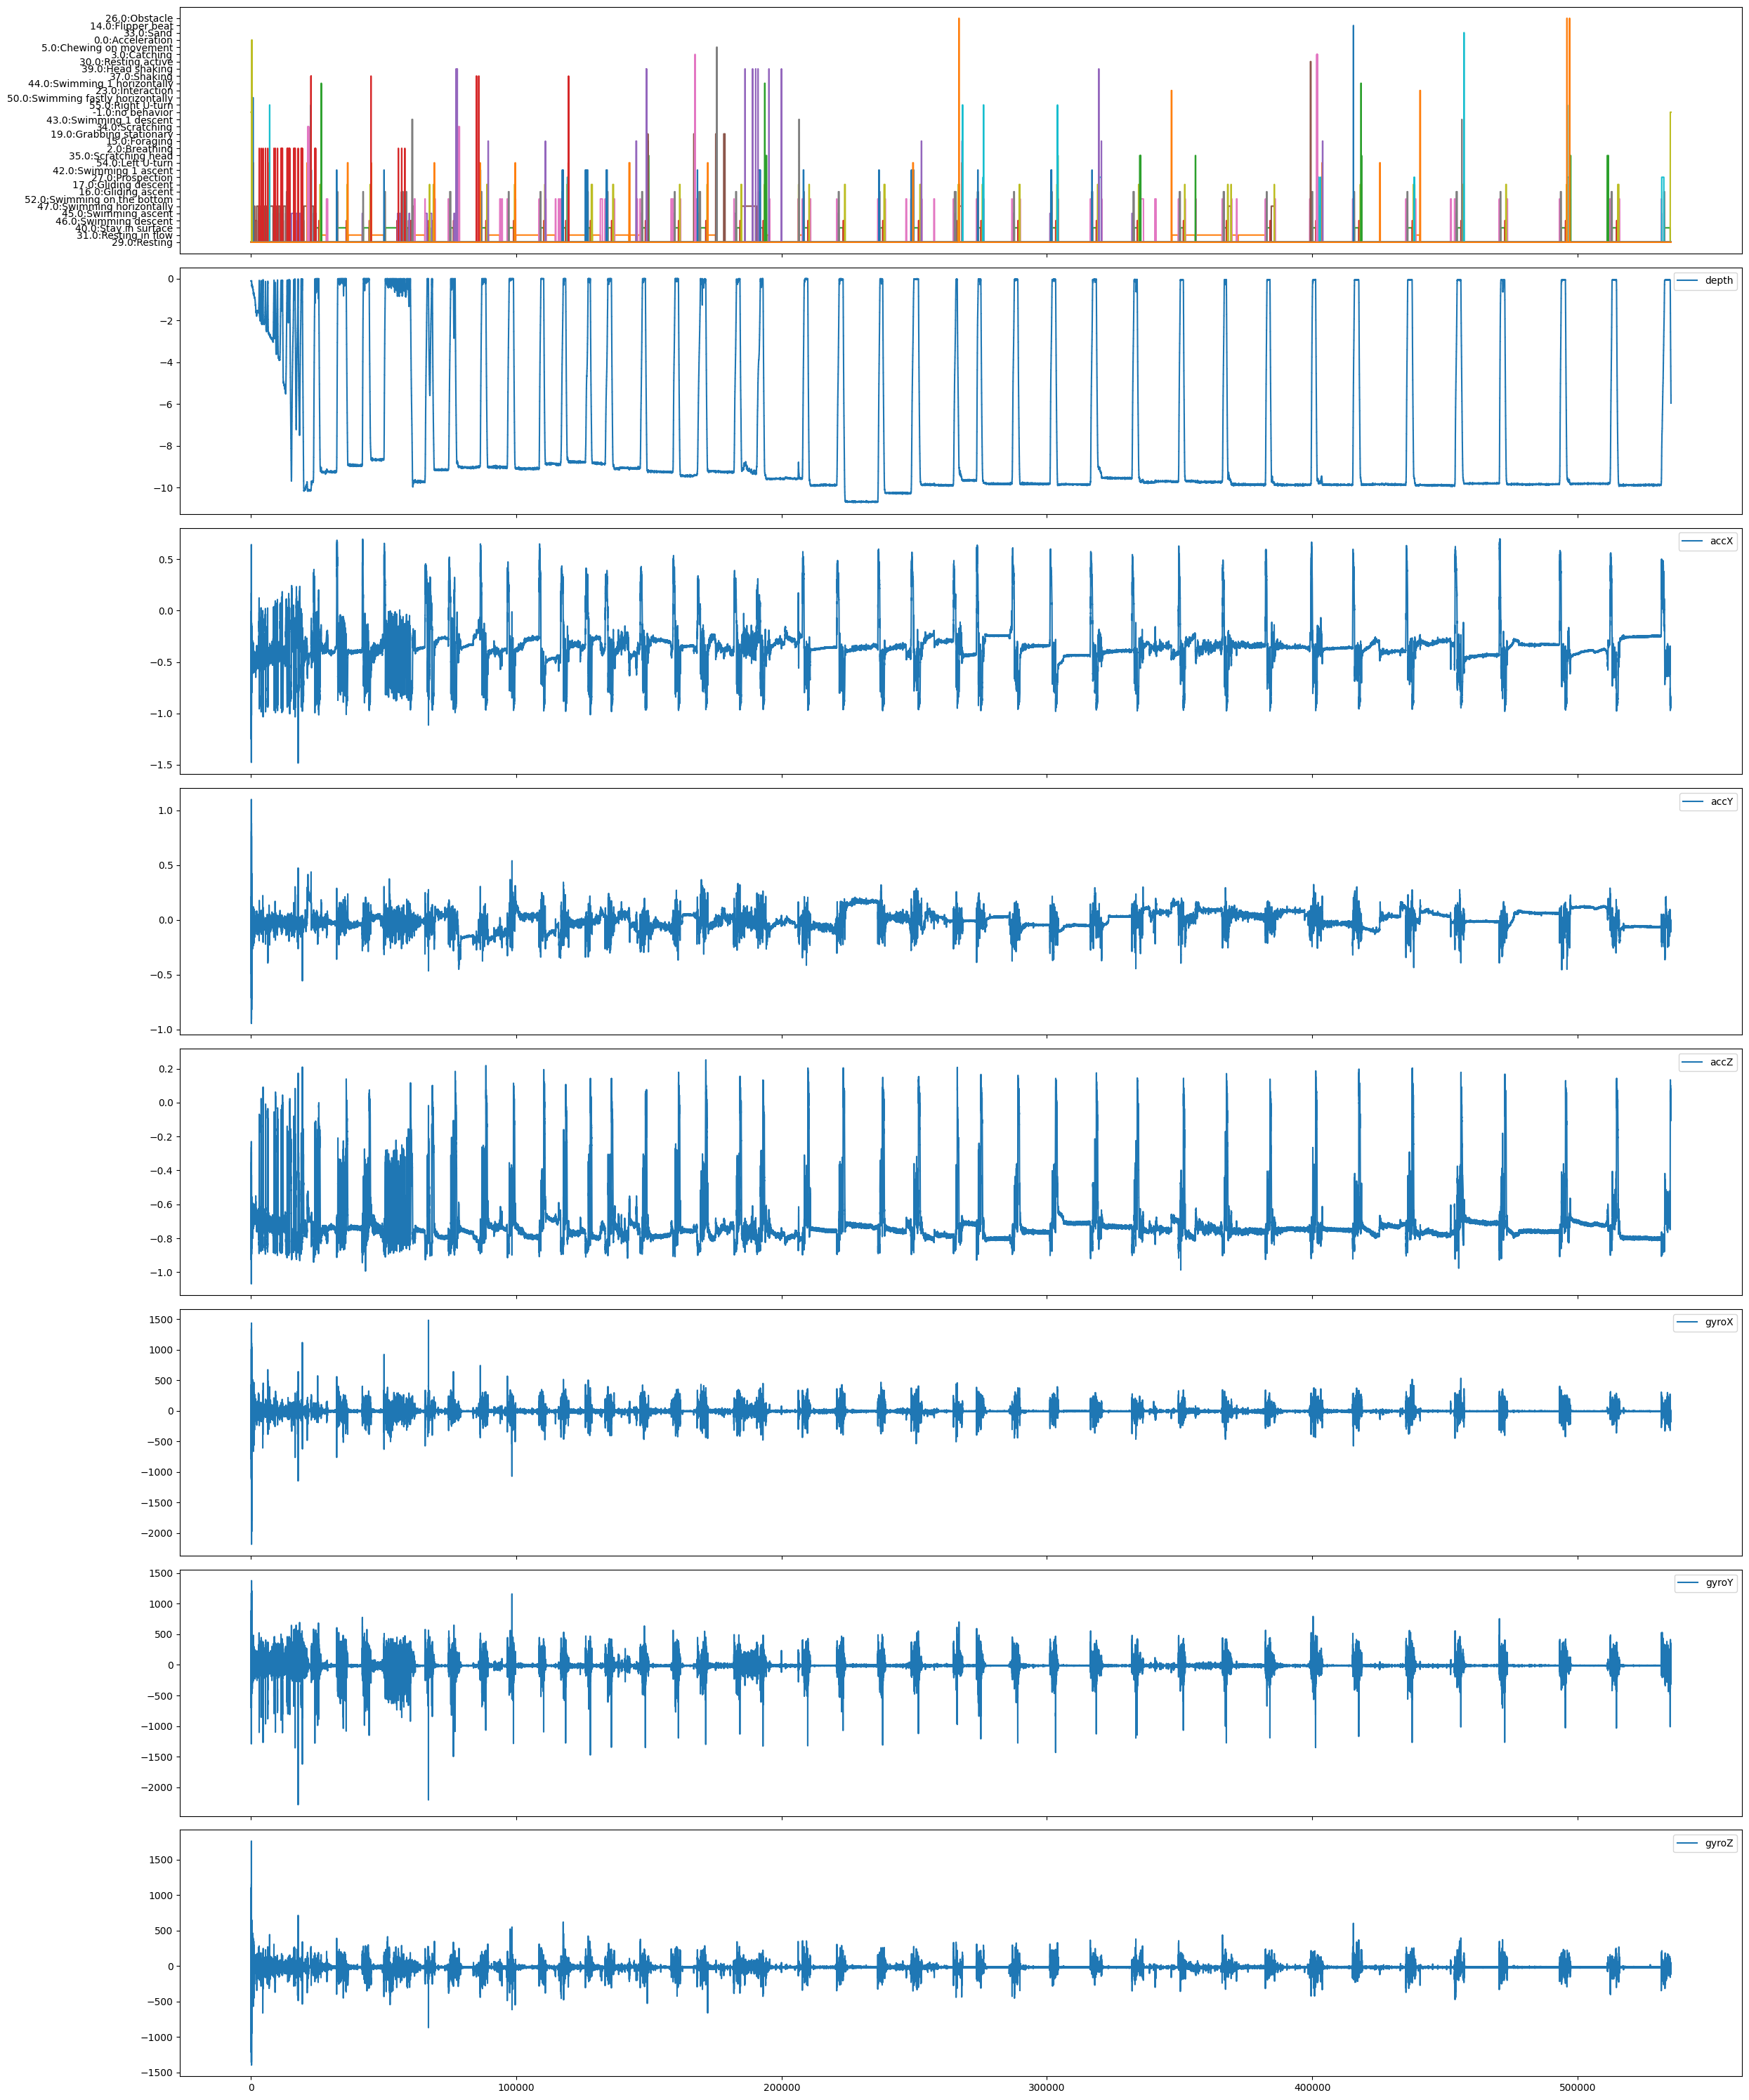

In [ ]:
plot_acc_beh(df)

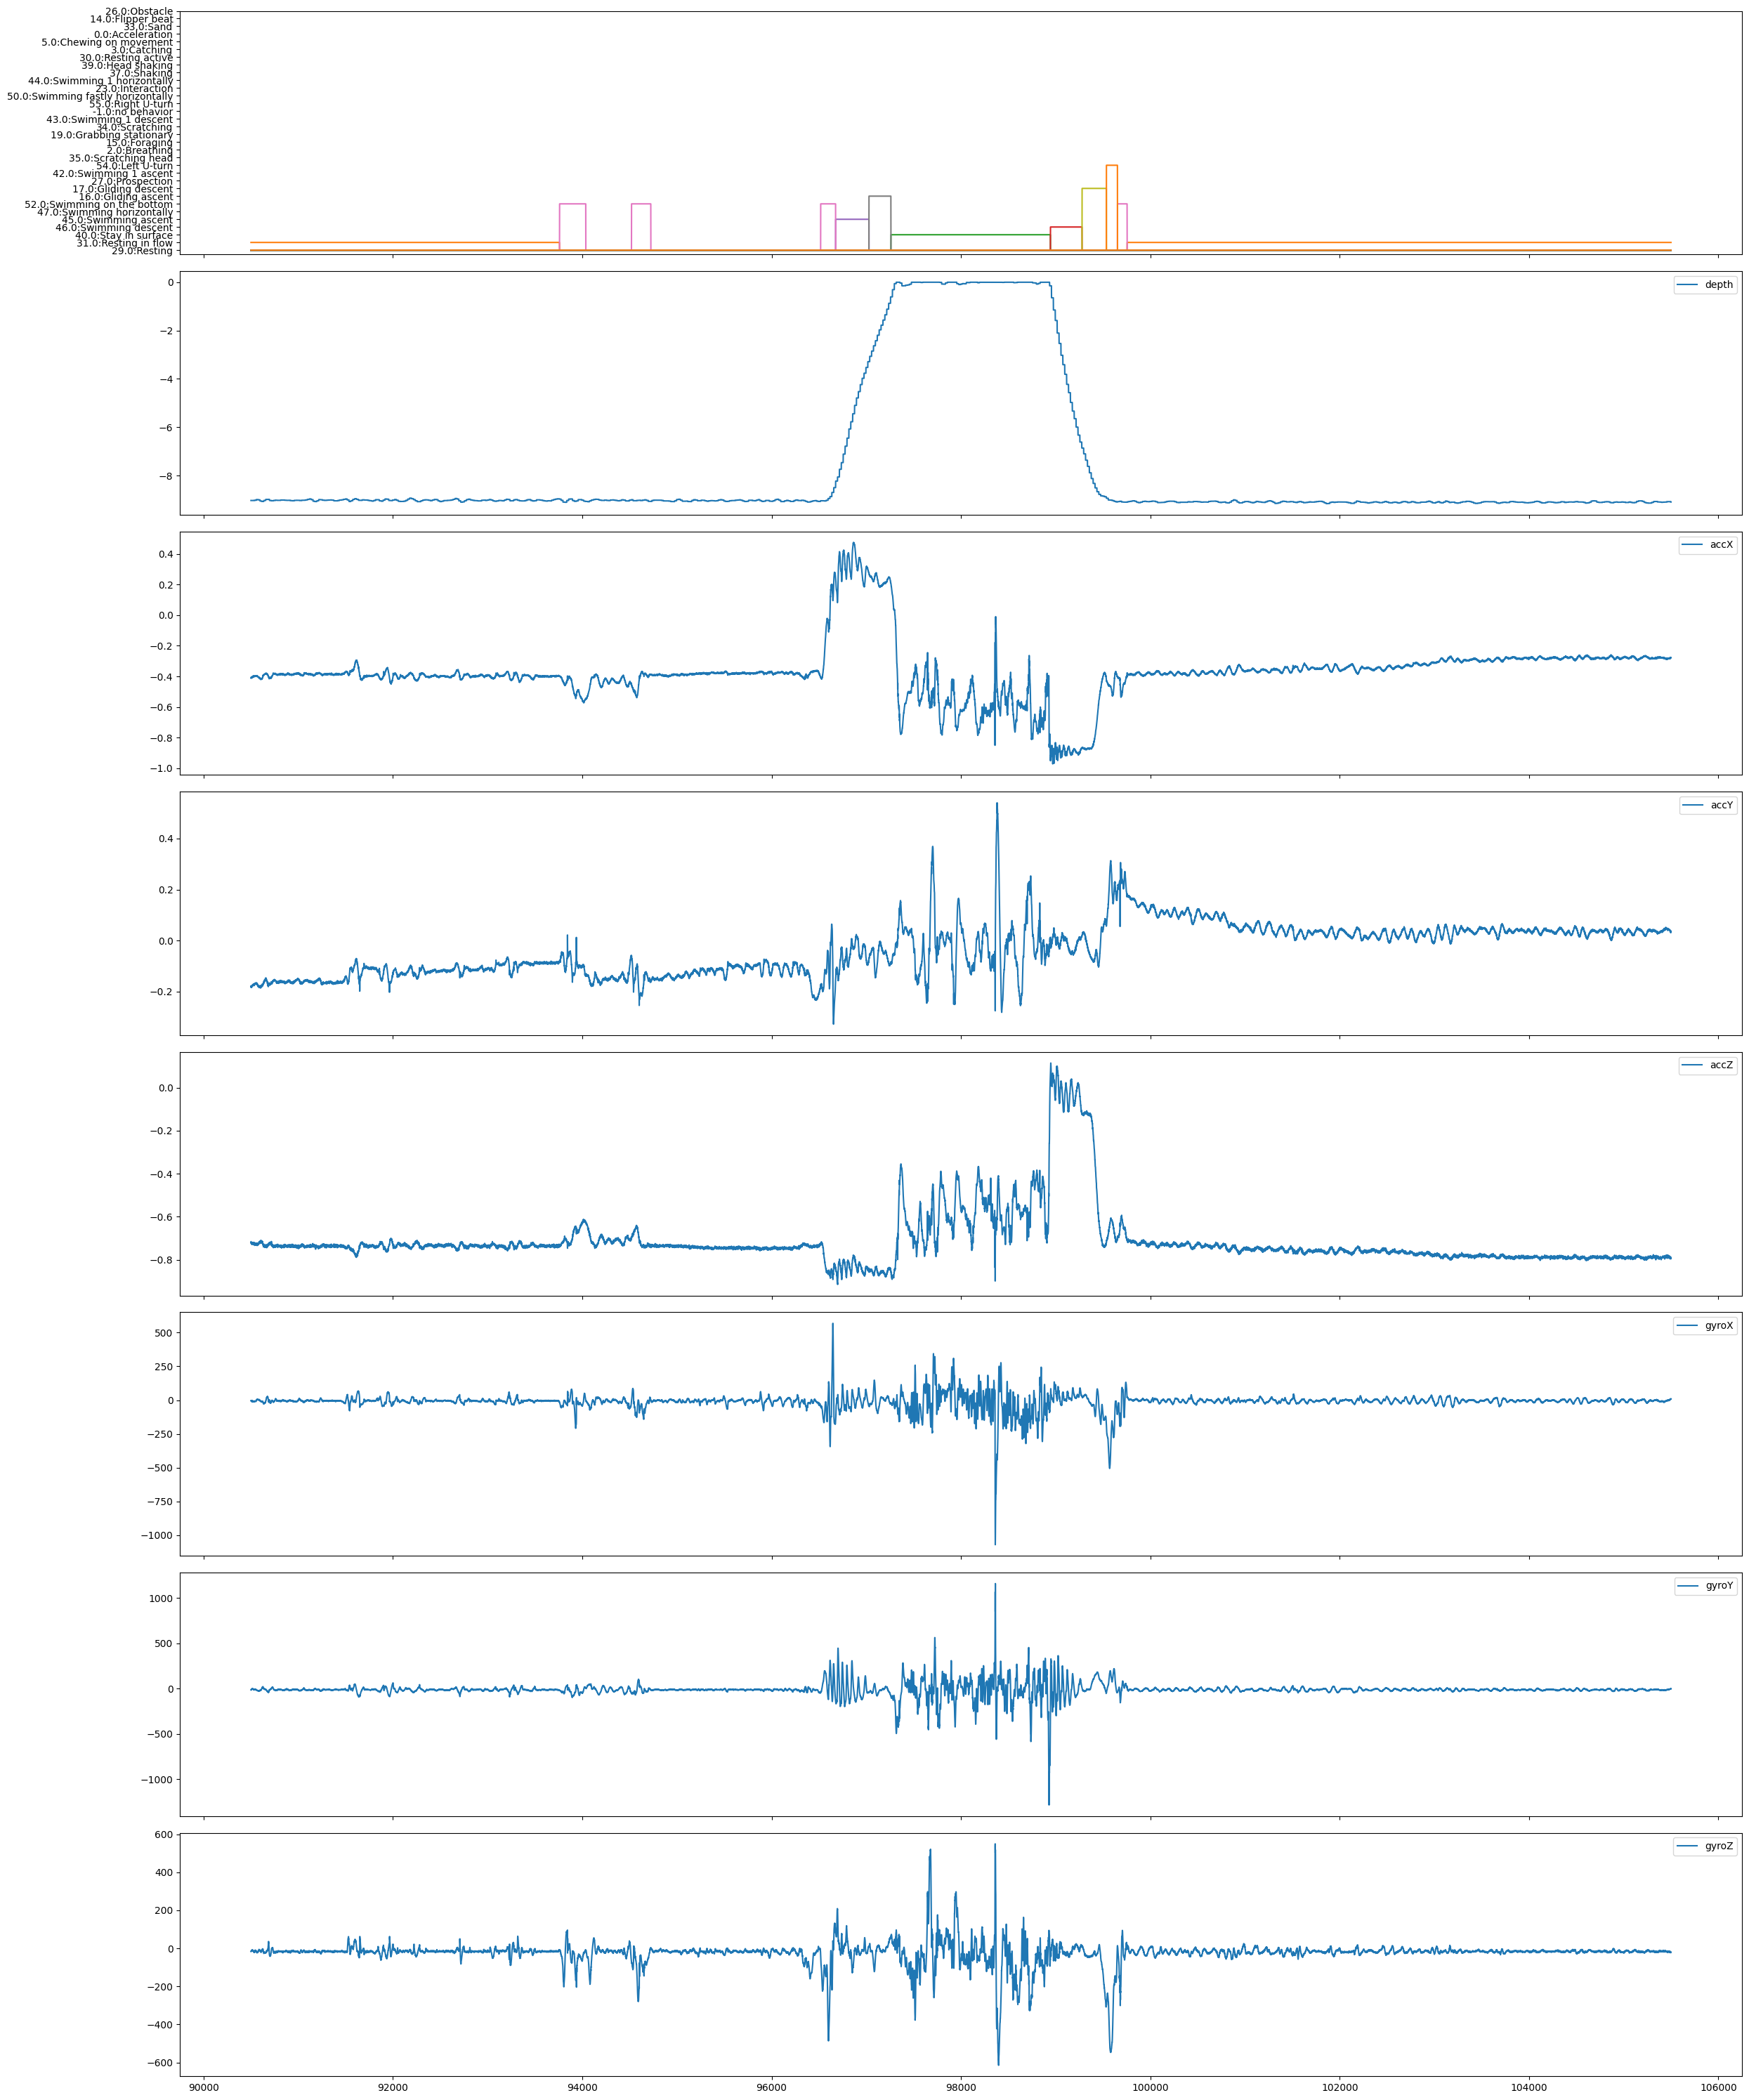

In [ ]:
#zoom1
mes_zoom_1=df.iloc[90500:105500,:].copy()
plot_acc_beh(mes_zoom_1)


##### another way to plot

In [ ]:
def plot_chosen_axes_beh(df,nb_axes,suffix="",addVerticalBars=True, Save=False, title="figures_acc_behavior.png"):


    colors=plt.rcParams['axes.prop_cycle'].by_key()['color']


    fig,axs=plt.subplots(2+len(nb_axes),1,figsize=(25,3*10),sharex=True)

    for i,ind in enumerate(main_beh_ind):
        axs[0].plot(df.index, (df["beh"]==ind)*i,c=colors[i%len(colors)])


    yticks=[]
    for ind in main_beh_ind:
        yticks.append(str(ind)+":"+behInd_to_behName[ind])

    axs[0].set_yticks(range(len(main_beh_ind)))
    axs[0].set_yticklabels(yticks,fontsize=10)

    axs[1].plot(df.index,-df.iloc[:,6],label="depth")
    axs[1].legend()

    w=2
    for i in nb_axes:
        axs[w].plot(df.index,df.iloc[:,i],label=df.columns[i])
        axs[w].legend()
        w+=1

    if Save==True :
        fig.savefig("Figures/"+ title)


    fig.tight_layout()

In [ ]:
"""print columns to select the ones you want to plot"""
for i,names in enumerate(dico_info['col_names']):
    print(i,names)

0 Accelerometer X [m/s²]
1 Accelerometer Y [m/s²]
2 Accelerometer Z [m/s²]
3 Gyroscope X [mrad/s]
4 Gyroscope Y [mrad/s]
5 Gyroscope Z [mrad/s]
6 Depth [m]
7 beh


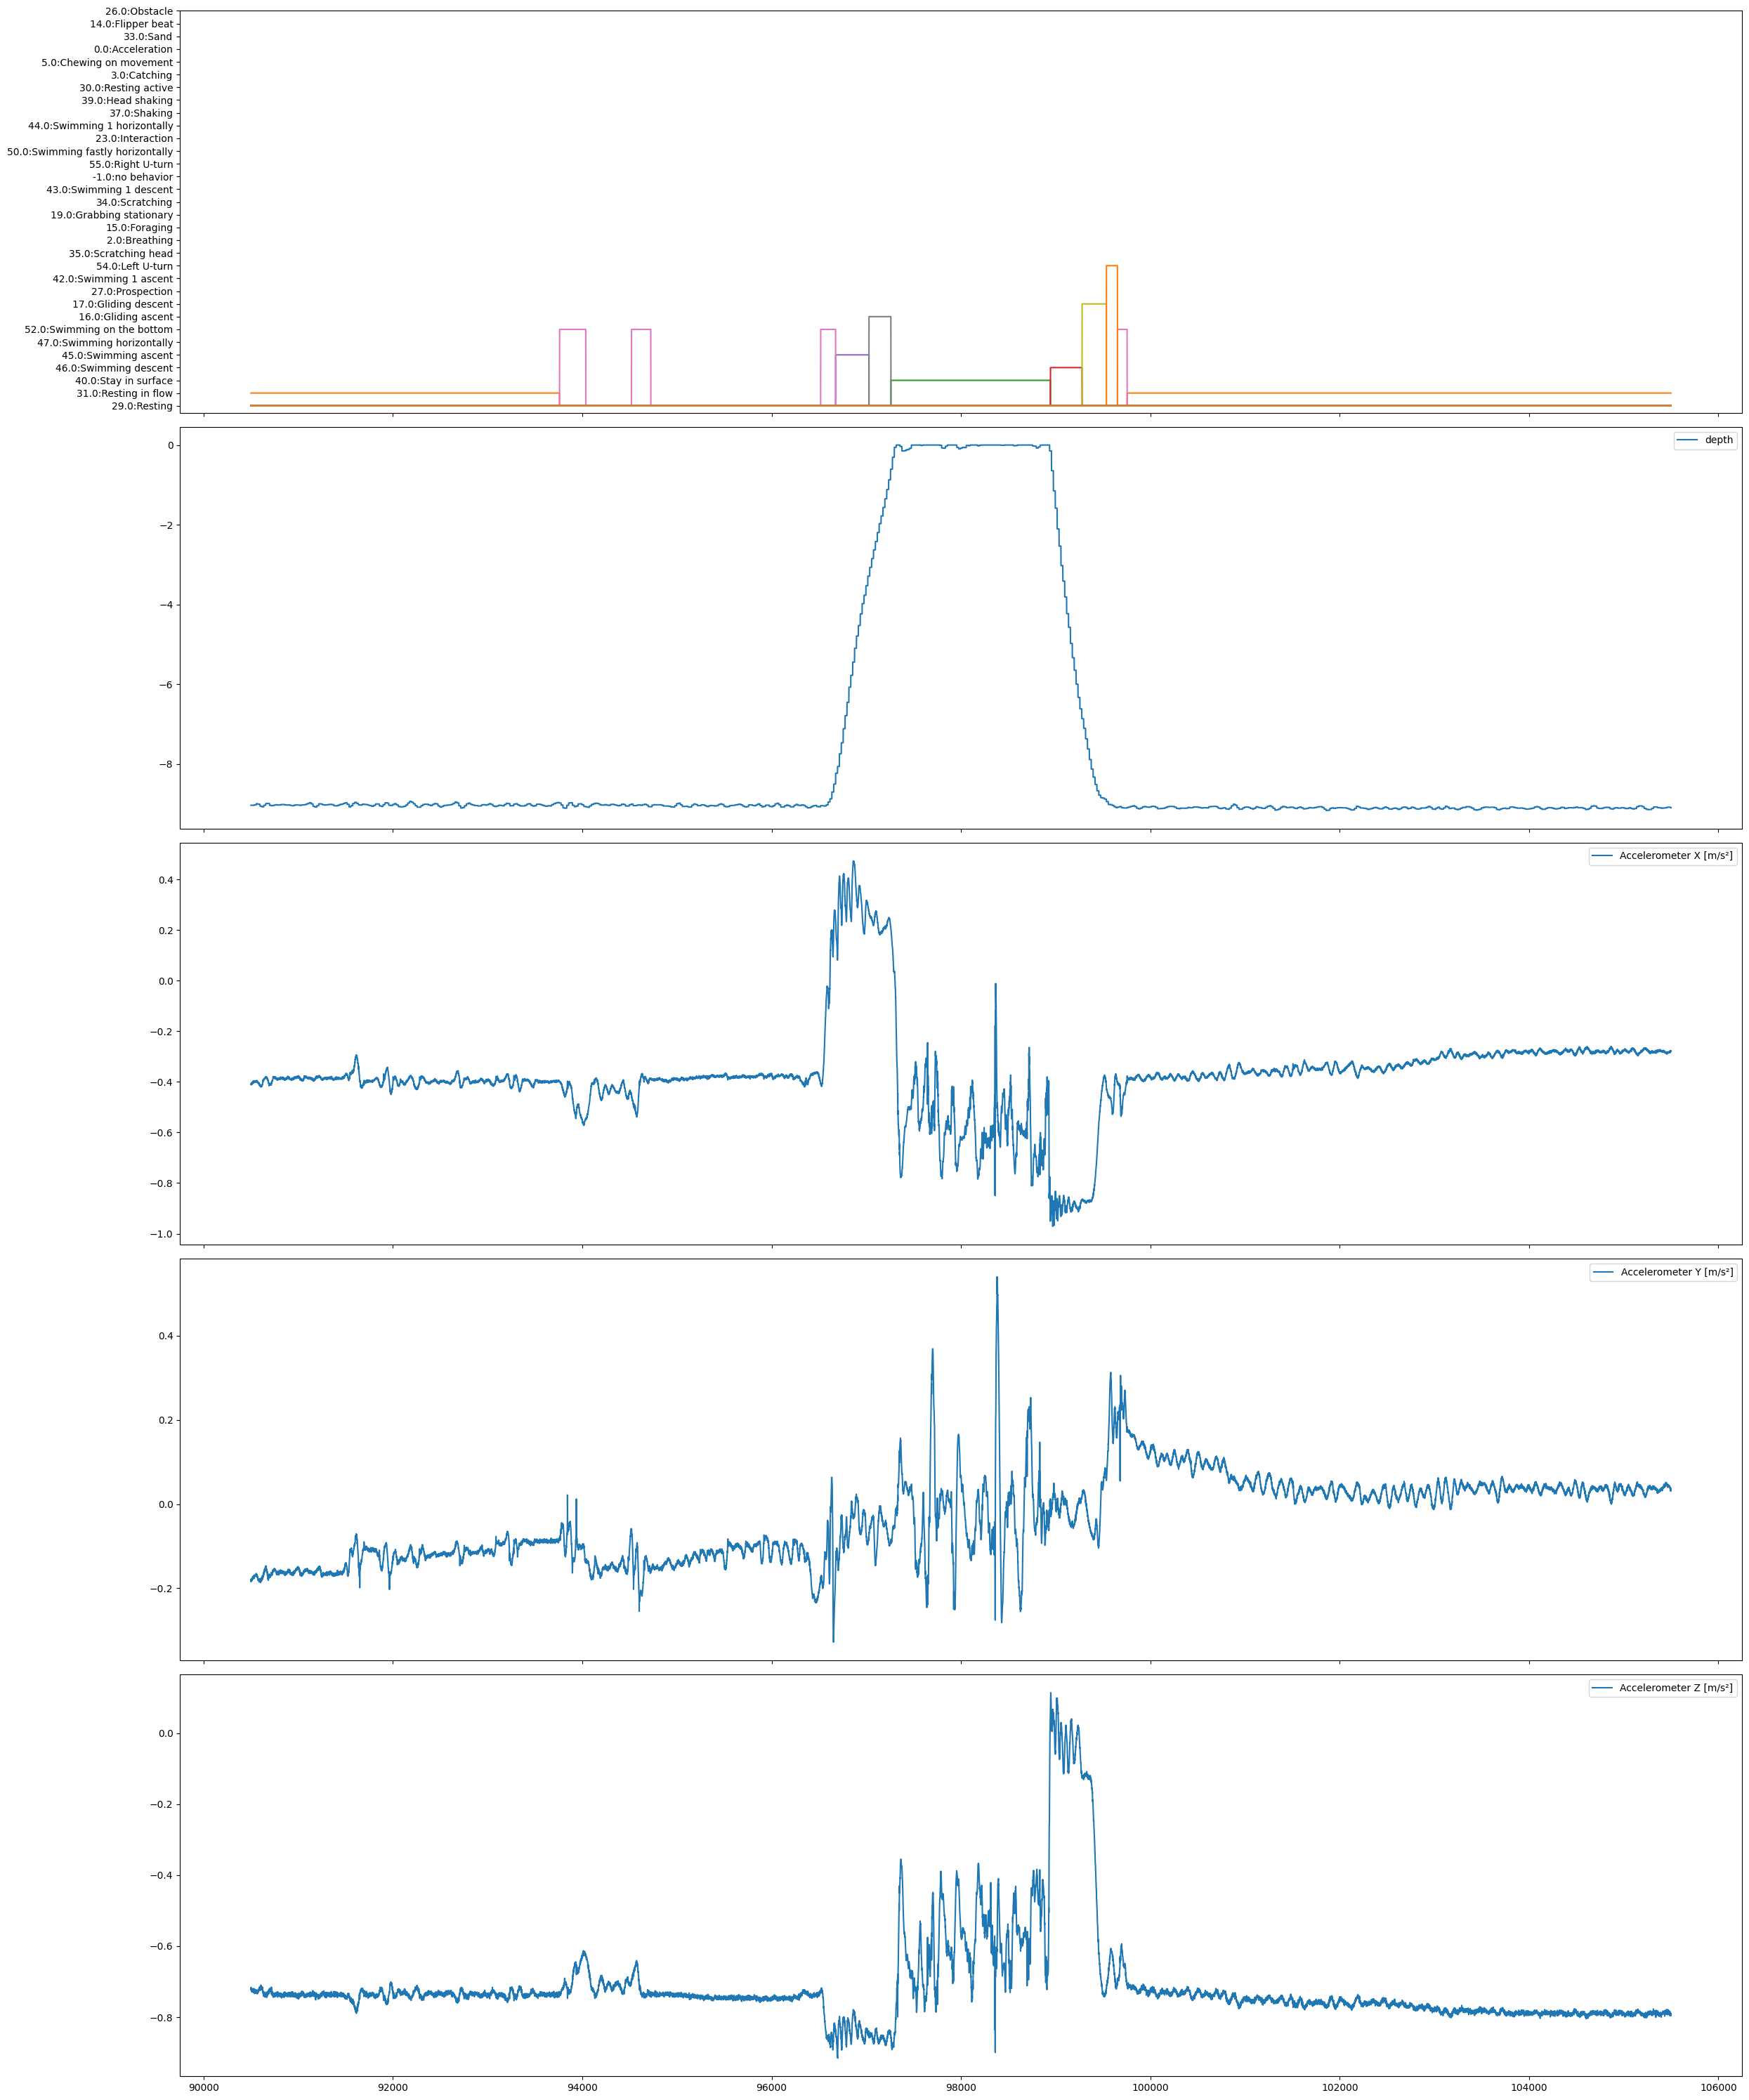

In [ ]:
axes_chosen=[0,1,2]
plot_chosen_axes_beh(mes_zoom_1, axes_chosen, Save=False)

#### Merge the behaviors according to pre-defined classes

We are going to create class object to save all the information that we want to keep for each behavioral category

In [22]:
class classBehavior:

    def __init__(self,id,name,behaviors):
        self.id=id   #the new number that we are giving to our behavioral category/class
        self.name=name #the name of the behavioral category/class created
        self.behaviors=behaviors #all the number of the behaviors that we want in our behavioral category/class


In [23]:
#We apply the classBehavior to for each behavioral category that we want to create
Other=classBehavior(0,"Other",None)
Breathing=classBehavior(1,"Breathing",[1,2,40])
Feeding=classBehavior(2,"Feeding",[3,4,5,6,7,11,12,13,18,19,20,21])
Gliding=classBehavior(3,"Gliding",[16,17])
Resting=classBehavior(4,"Resting",[29,30,31,32])
Scratching=classBehavior(5,"Scratching",[34,35,36])
Swimming=classBehavior(6,"Swimming",[42,45,48,43,46,49,27,44,47,50,56,52,54,55])

CLASSES=[Other, Breathing, Feeding, Gliding, Resting, Scratching, Swimming]

In [24]:
#if you want to check all the behaviors contained in Swimming class
for beh in Swimming.behaviors:
  print(beh, ": ", behInd_to_behName[beh])


42 :  Swimming 1 ascent
45 :  Swimming ascent
48 :  Swimming fastly ascent
43 :  Swimming 1 descent
46 :  Swimming descent
49 :  Swimming fastly descent
27 :  Prospection
44 :  Swimming 1 horizontally
47 :  Swimming horizontally
50 :  Swimming fastly horizontally
56 :  Watching
52 :  Swimming on the bottom
54 :  Left U-turn
55 :  Right U-turn


In [25]:
#here we create a new column "beh_merge" in our dataset with the new labels corresponding to the behavioral categories.

pre_label=df["beh"].copy()
df["beh_merge"]=np.zeros_like(pre_label)
for CLASS in CLASSES:
    if CLASS!=Other:
      for beh in CLASS.behaviors:
          df["beh_merge"][pre_label==beh]=CLASS.id
del pre_label

(array([  3140.,  58754.,   1392.,  20096., 355810.,   2721.,  93288.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <BarContainer object of 7 artists>)

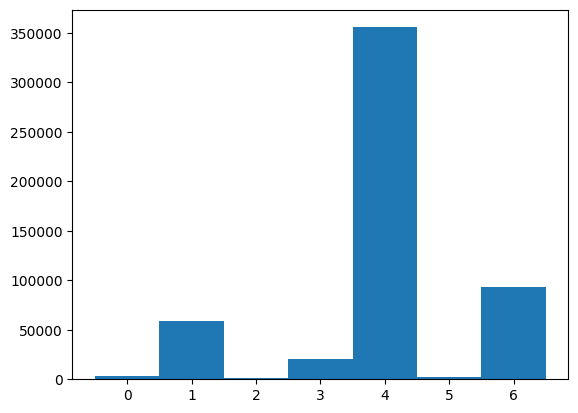

In [26]:
#Let's visualise the distribution of our behavior
plt.hist(df["beh_merge"],bins=np.arange(df["beh_merge"].min(),df["beh_merge"].max()+2,1)-.5)

In [27]:
def plot_chosen_axes_beh_vs2(df,nb_axes, classes, suffix="",addVerticalBars=True, Save=False, title="figures_acc_behavior.png"):

    #listes des couleurs par défaut
    colors=plt.rcParams['axes.prop_cycle'].by_key()['color']


    fig,axs=plt.subplots(2+len(nb_axes),1,figsize=(25,3*10),sharex=True)

    for i in range(len(classes)):
        axs[0].plot(df.index, (df["beh_merge"]==i)*i,c=colors[i%len(colors)])


    yticks=[]
    for ind in classes:
        yticks.append(str(ind.id)+":"+ind.name)

    axs[0].set_yticks(range(len(classes)))
    axs[0].set_yticklabels(yticks,fontsize=10)

    axs[1].plot(df.index,-df.iloc[:,6],label="depth")
    axs[1].legend()

    w=2
    for i in nb_axes:
        axs[w].plot(df.index,df.iloc[:,i],label=df.columns[i])
        axs[w].legend()
        w+=1

    if Save==True :
        fig.savefig("Figures/"+ title)


    fig.tight_layout()

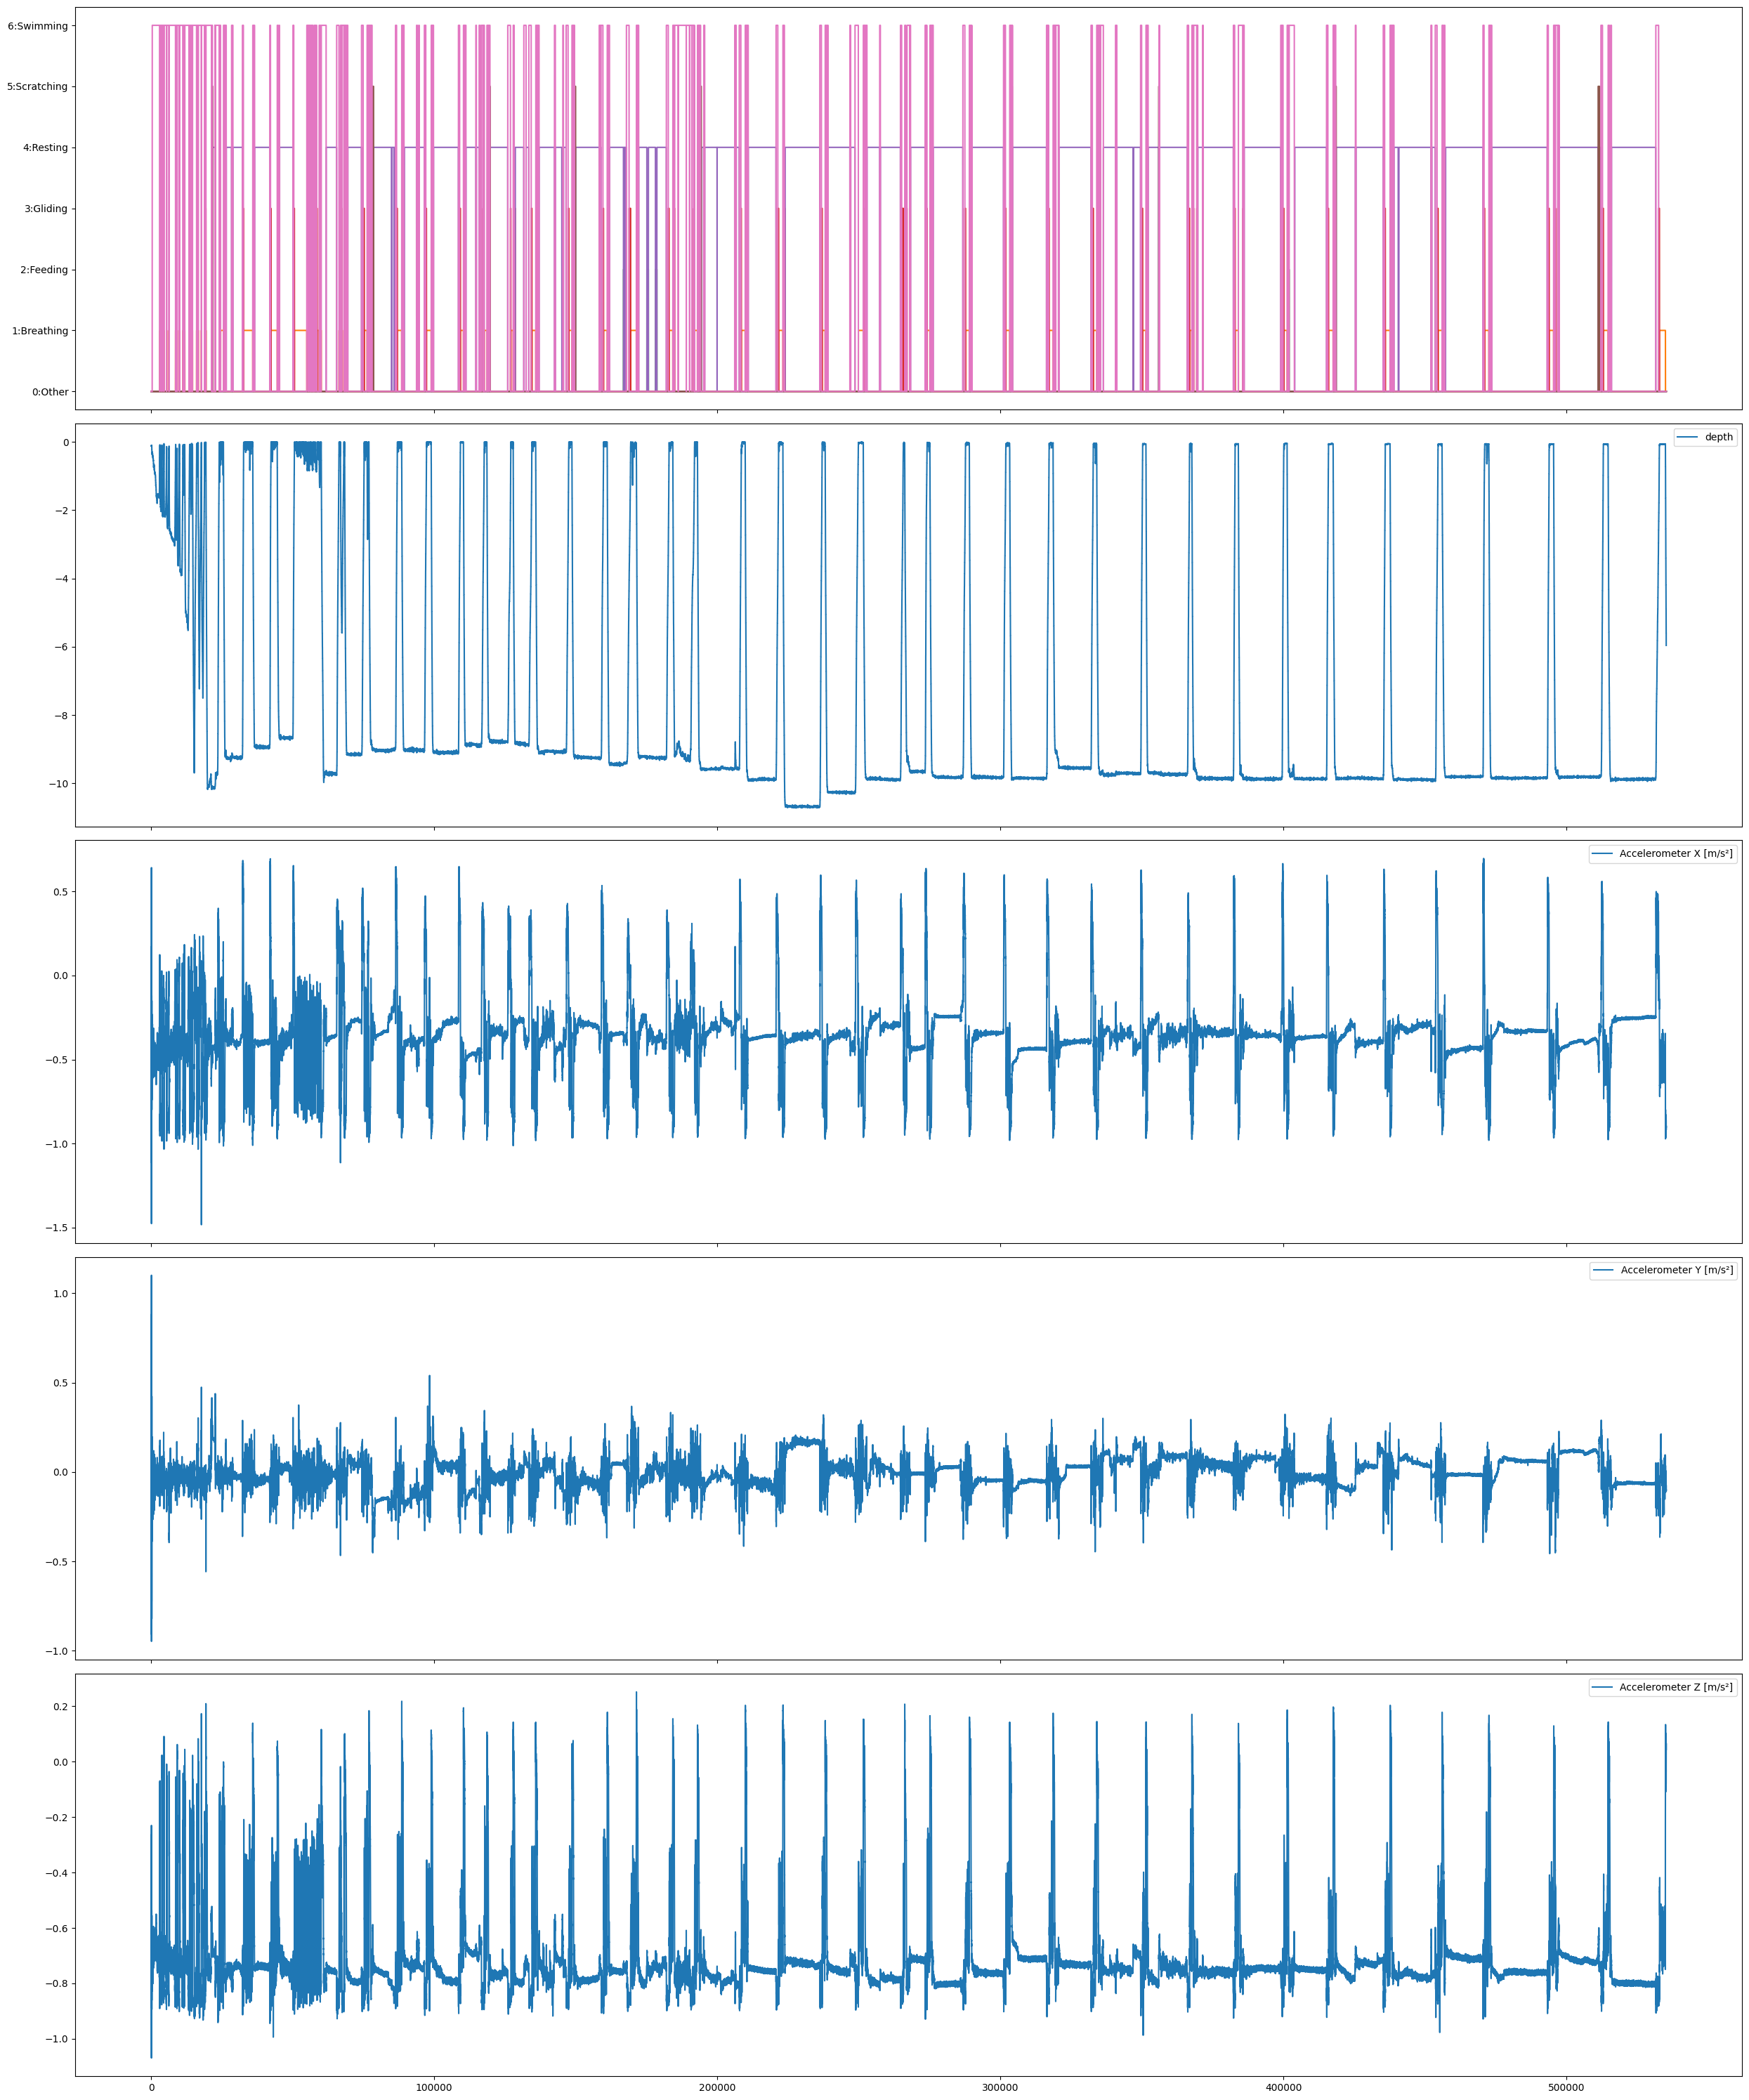

In [28]:
plot_chosen_axes_beh_vs2(df, [0,1,2], CLASSES)

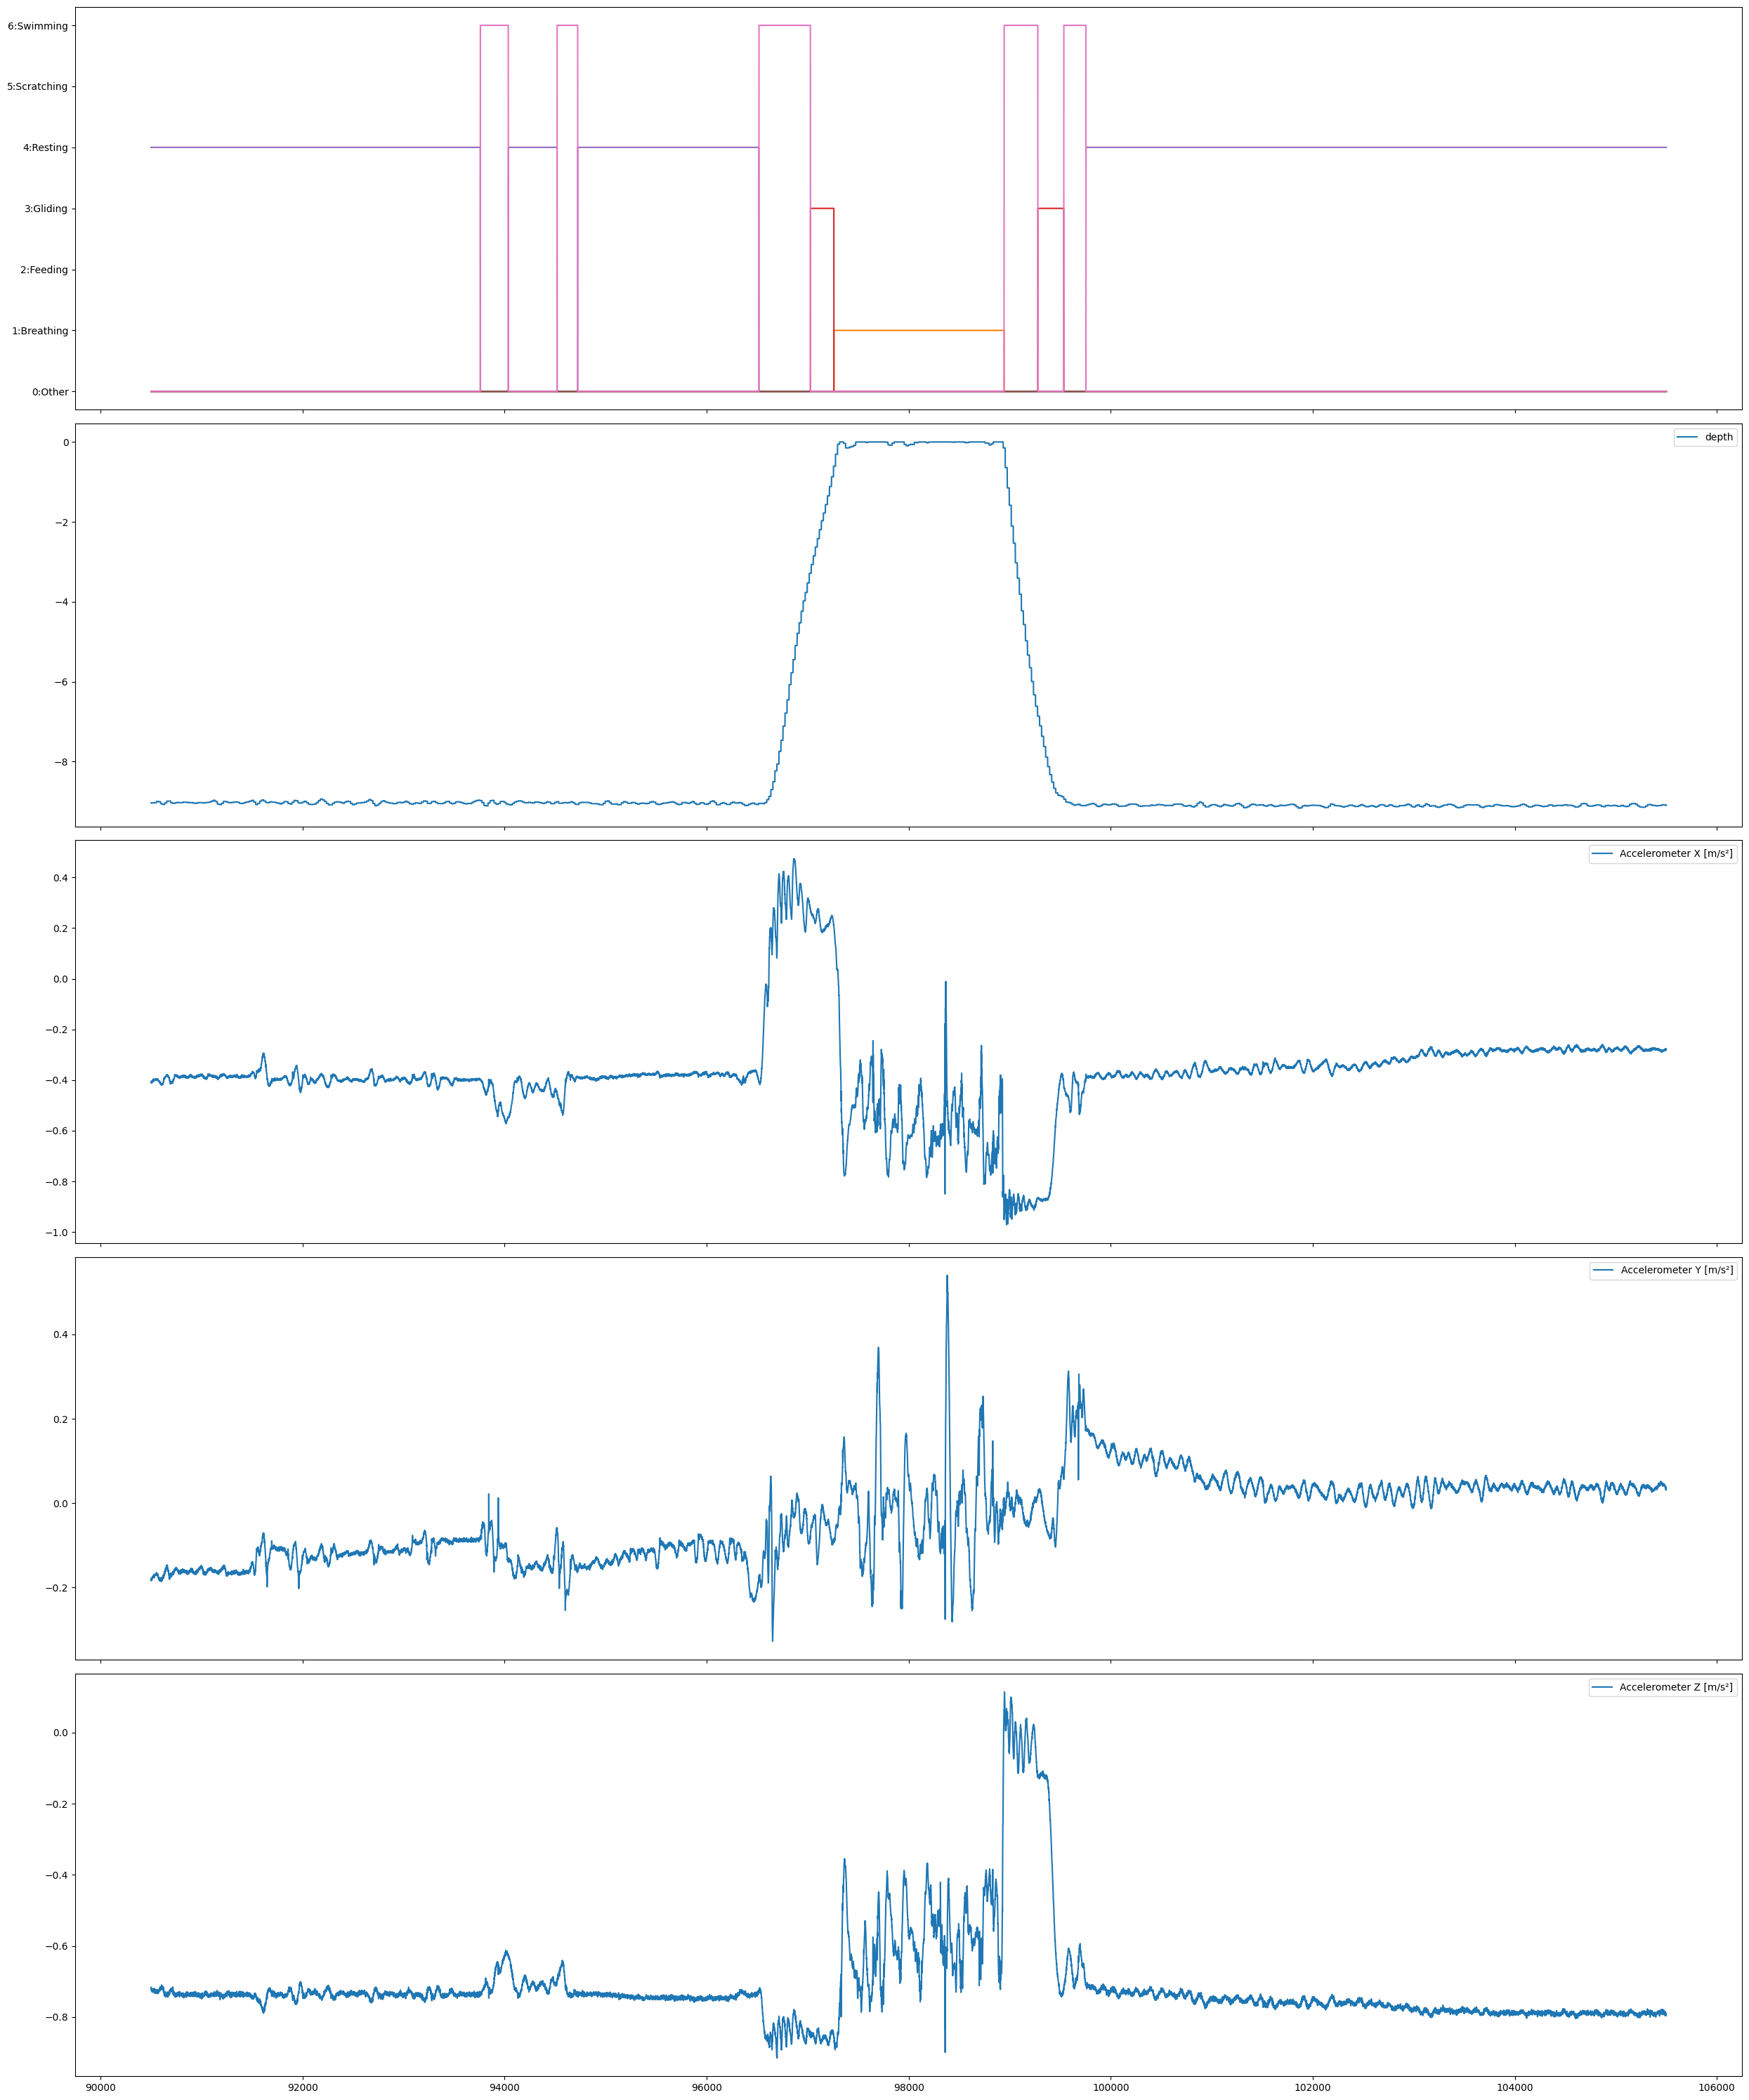

In [29]:
#zoom1
mes_zoom_1=df.iloc[90500:105500,:].copy()
plot_chosen_axes_beh_vs2(mes_zoom_1, [0,1,2], CLASSES)

##Correction Pressure


first we are going to calculate a new variable : the difference of the pressure instead of the pressure itself as the deep learning algorithms manage standardised values

In [ ]:
df.head()

,Accelerometer X [m/s²],Accelerometer Y [m/s²],Accelerometer Z [m/s²],Gyroscope X [mrad/s],Gyroscope Y [mrad/s],Gyroscope Z [mrad/s],Depth [m],beh,beh_merge
0,-0.124469,-0.047347,-0.826378,-107.486741,238.386434,72.367310,0.113342,-1.0,0.0
1,-0.321912,-0.000732,-0.818812,-31.394642,284.148116,100.569277,0.113342,-1.0,0.0
2,-0.167423,-0.061258,-0.756089,217.101931,387.910069,28.201967,0.113342,-1.0,0.0
3,-0.407087,-0.266511,-0.511788,-120.789555,-184.643064,371.946691,0.113342,-1.0,0.0
4,-0.634305,-0.240152,-0.628936,-423.029499,-542.222716,375.671479,0.113342,-1.0,0.0


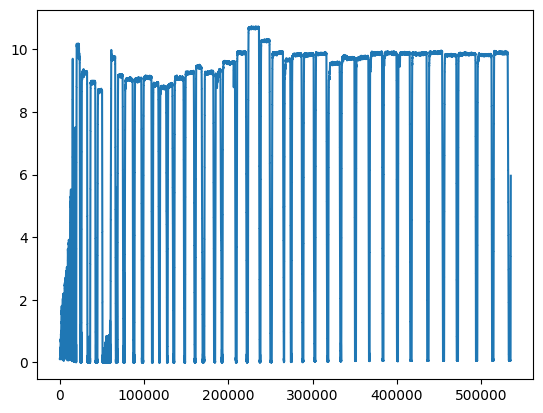

In [ ]:
plt.plot(df['Depth [m]'])

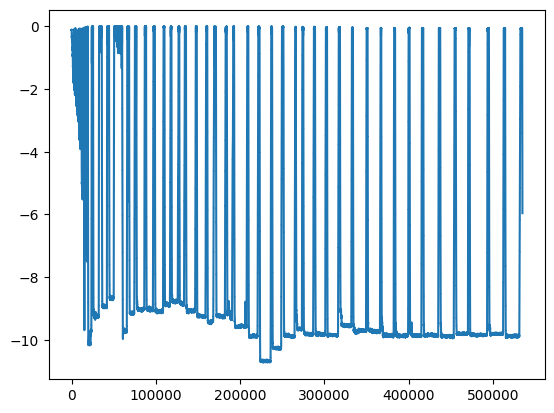

In [ ]:
#plot in a way that you can visualise the vertical movement performed by the turtle (dive profiles)
plt.plot(-df['Depth [m]'])

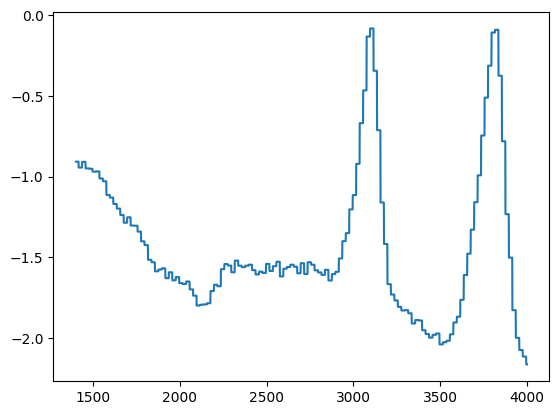

In [ ]:
#zoom
plt.plot(-df['Depth [m]'][1400:4000])

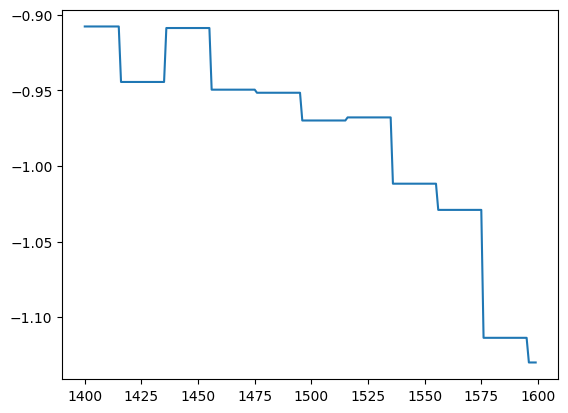

In [ ]:
#zoom in even more
plt.plot(-df['Depth [m]'][1400:1600])

In [ ]:
# you can see here than every 20 values, the pressure is different
np.where(np.diff(df['Depth [m]'])!=0)[0] #index where the pressure changes

array([    15,     35,     55, ..., 535155, 535175, 535195])

First we are going to correct the pressure to remove the square shape. This is due to the fact that the pressure was recorded at 1Hz (1 value per second) while the accelerometer and gyroscope did record at 20 Hz (20 values per second). The 19 values between every second is just a copy of the value mesure at the second.   


In [ ]:
df['Pressure_corr']=np.NAN
df['Pressure_corr'][np.where(np.diff(df['Depth [m]'])!=0)[0]]=df['Depth [m]'][np.where(np.diff(df['Depth [m]'])!=0)[0]]
df['Pressure_corr'].interpolate(method='linear',inplace=True)
df['Pressure_corr'].fillna(method="bfill",inplace=True)

In [ ]:
df.head()

,Accelerometer X [m/s²],Accelerometer Y [m/s²],Accelerometer Z [m/s²],Gyroscope X [mrad/s],Gyroscope Y [mrad/s],Gyroscope Z [mrad/s],Depth [m],beh,beh_merge,Pressure_corr
0,-0.124469,-0.047347,-0.826378,-107.486741,238.386434,72.367310,0.113342,-1.0,0.0,0.113342
1,-0.321912,-0.000732,-0.818812,-31.394642,284.148116,100.569277,0.113342,-1.0,0.0,0.113342
2,-0.167423,-0.061258,-0.756089,217.101931,387.910069,28.201967,0.113342,-1.0,0.0,0.113342
3,-0.407087,-0.266511,-0.511788,-120.789555,-184.643064,371.946691,0.113342,-1.0,0.0,0.113342
4,-0.634305,-0.240152,-0.628936,-423.029499,-542.222716,375.671479,0.113342,-1.0,0.0,0.113342


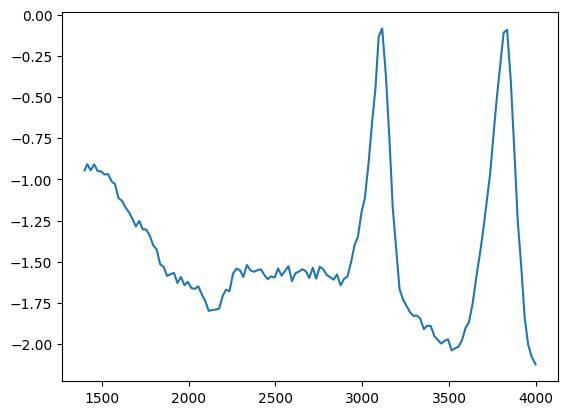

In [ ]:
#visualise the correction
plt.plot(-df['Pressure_corr'][1400:4000])

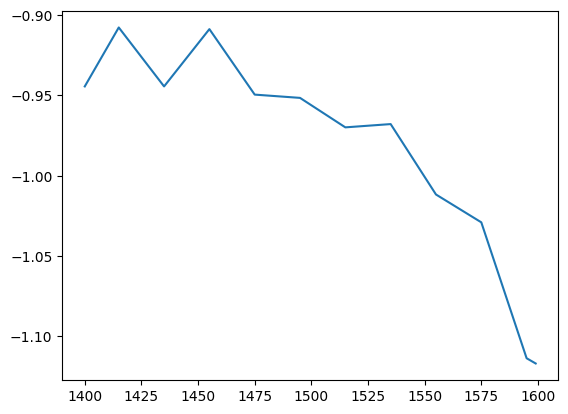

In [ ]:
plt.plot(-df['Pressure_corr'][1400:1600])

In [ ]:
#here we just calculate the difference of pressure between every second

df['Pressure_diff']=np.NAN #column where we are going to save the difference of pressure
df['Pressure_diff']=df['Pressure_corr'].diff(20)  #calculate the difference of pressure every 20 values as the pressure was recorded at 1Hz
df['Pressure_diff'][0:20]=df['Pressure_diff'][20]



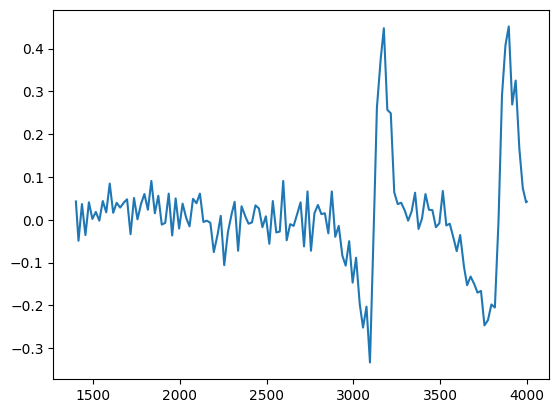

In [ ]:
plt.plot(df['Pressure_diff'][1400:4000])


## Exercice : Calculate Static, Dynamic acceleration and Vedba

**Homework** :

I- try to write the script to calculate :


*   static acceleration : using an average sliding window with a window size of 2 seconds, you can play around with this value and try out different values.
*  dynamic acceleration
* the Vedba based on the dynamic acceleration

II- Write a loop to preprocess all the files, the loop should contain :


*   create extra column with the merged behaviors
*   correct the pressure and calculate the difference of pressure
*   calculate and add the descriptive variables : static/dynamic/vedba

for each file, your new dataset should contain 18 columns (accx, accy, accz, gyrx, gyry, gyrz, depth, beh, beh_merge, stx, sty, stz, dx, dy, dz, vedba, pressure_corrected, pressure_dif (the order doesn't matter)

apply your code on all the files and save the files in numpy in a new folder. We will use these preprocessed files for lecture 2 for the algorithms !


I- Calculate the static, dynamic and vedba

first we are going to figure out how to calculate the static/dynamic and vedba on acceleration signals on a small portion of one signal

In [30]:
AccX=mes_zoom_1.iloc[4000:10000,0].to_numpy()  #code to isolate small portion of the signal, here column 0 => AccX

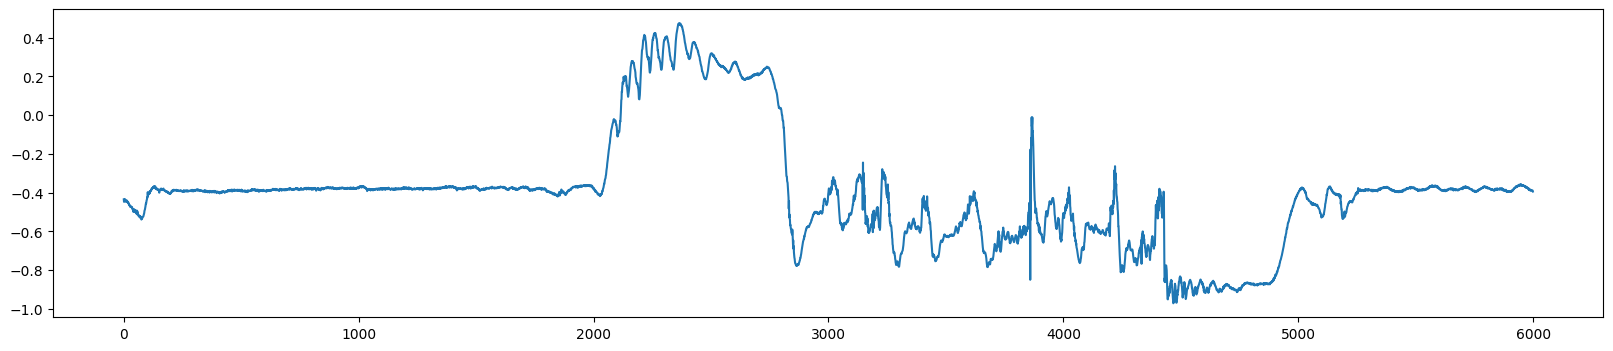

In [31]:
fig,ax=plt.subplots(figsize=(20,4))
ax.plot(AccX)

In [ ]:
# static accelaretion
w_size=4
Stx=[]

